In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [2]:
data=pd.read_json(r'Narendra Modi Tweets.json')

In [3]:
data_en = data[data['Lang']=='en']

In [4]:
data_en.head()

,Text,Lang,Source,Time,Retweets
0,Addressed the Global Potato Conclave at Gandhi...,en,Twitter for iPhone,1580222363000,2388
10,Extremely touched by the lovely #RepublicDay w...,en,Twitter Web App,1580125780000,2591
100,Tributes to the great Balasaheb Thackeray on h...,en,Twitter for iPhone,1579748075000,8817
101,India will always remain grateful to Netaji Su...,en,Twitter Media Studio,1579747999000,9996
102,"On 23rd January 1897, Janakinath Bose wrote in...",en,Twitter for iPhone,1579747828000,8500


## 1.) CLEAN THE TWEETS

In [5]:
tweet_joined=" ".join(data_en.Text.values)
tweet_joined

'Addressed the Global Potato Conclave at Gandhinagar via video-conferencing. \n\nShared how Indian farmers are taking… https://t.co/ZXhwJhW5hT Extremely touched by the lovely #RepublicDay wishes @PMBhutan!\n\nYou have wonderfully highlighted the unbreakable bo… https://t.co/9RZBawTKS3 Tributes to the great Balasaheb Thackeray on his Jayanti. Courageous and indomitable, he never hesitated from raisi… https://t.co/KXT7U7wQ9P India will always remain grateful to Netaji Subhas Chandra Bose for his bravery and indelible contribution to resis… https://t.co/EWE0BIa91w On 23rd January 1897, Janakinath Bose wrote in his diary, “A son was born at midday.”\n\nThis son became a valorous f… https://t.co/B3sHSTU7Nm In line with our focus on speedy and timely completion of projects, we reviewed eleven key projects.\n\nThere were al… https://t.co/ktKEHEmdmU We had an excellent Pragati Session today, during which a wide range of policy initiatives and development projects… https://t.co/FXRRUA39H2 Exams

In [6]:
stop=stopwords.words("english")

In [7]:
lemm =WordNetLemmatizer()

In [8]:
def clean_text(sent):
    tokens=regexp_tokenize(tweet_joined.lower(),'#[\w]+')
    lemmed=[lemm.lemmatize(term) for term in tokens\
            if term not in stop and \
            term not in list(punctuation) and\
            len(term)>2]
    res=" ".join(lemmed)
    return res

In [9]:
data_en['cleaned_text']=data.Text.apply(clean_text)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
data_en.head()

,Text,Lang,Source,Time,Retweets,cleaned_text
0,Addressed the Global Potato Conclave at Gandhi...,en,Twitter for iPhone,1580222363000,2388,#republicday #parikshapecharcha2020 #parikshap...
10,Extremely touched by the lovely #RepublicDay w...,en,Twitter Web App,1580125780000,2591,#republicday #parikshapecharcha2020 #parikshap...
100,Tributes to the great Balasaheb Thackeray on h...,en,Twitter for iPhone,1579748075000,8817,#republicday #parikshapecharcha2020 #parikshap...
101,India will always remain grateful to Netaji Su...,en,Twitter Media Studio,1579747999000,9996,#republicday #parikshapecharcha2020 #parikshap...
102,"On 23rd January 1897, Janakinath Bose wrote in...",en,Twitter for iPhone,1579747828000,8500,#republicday #parikshapecharcha2020 #parikshap...


## 2.) CREATE THE DTM USING COUNT VECTORIZER

In [11]:
count_vect=CountVectorizer(min_df=5,max_features=150)

In [12]:
X=count_vect.fit_transform(data_en['cleaned_text'])

In [13]:
count_vect.get_feature_names()

['100yearsofassocham',
 'asean2019',
 'bharatkilaxmi',
 'cab',
 'cab2019',
 'changewithin',
 'chennaiconnect',
 'constitutionday',
 'diwali',
 'gandhi150',
 'gandhijayanti',
 'hagibis',
 'htls2019',
 'incredibleindia',
 'jalshakti4india',
 'mannkibaat',
 'nitilecture',
 'parikshapecharcha2020',
 'plogforcleanplanet',
 'plogforswachhbharat',
 'republicday',
 'republicsummit',
 'singaporeindiahackathon',
 'solareclipse2019',
 'thukmat']

In [14]:
DTM=pd.DataFrame(X.toarray(),columns=count_vect.get_feature_names())
DTM.head()

,100yearsofassocham,asean2019,bharatkilaxmi,cab,cab2019,changewithin,chennaiconnect,constitutionday,diwali,gandhi150,...,mannkibaat,nitilecture,parikshapecharcha2020,plogforcleanplanet,plogforswachhbharat,republicday,republicsummit,singaporeindiahackathon,solareclipse2019,thukmat
0,1,1,1,1,1,1,1,3,6,4,...,24,1,2,1,1,8,2,2,1,1
1,1,1,1,1,1,1,1,3,6,4,...,24,1,2,1,1,8,2,2,1,1
2,1,1,1,1,1,1,1,3,6,4,...,24,1,2,1,1,8,2,2,1,1
3,1,1,1,1,1,1,1,3,6,4,...,24,1,2,1,1,8,2,2,1,1
4,1,1,1,1,1,1,1,3,6,4,...,24,1,2,1,1,8,2,2,1,1


## USING KMEANS ALGO. CLUSTER THE TWEETS INTO 4 GROUPS

In [15]:
kmeans=KMeans(n_clusters=4,random_state=0)
y_kmeans=kmeans.fit_predict(DTM)

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)


In [16]:
DTM['cluster']=y_kmeans
DTM.head()

,100yearsofassocham,asean2019,bharatkilaxmi,cab,cab2019,changewithin,chennaiconnect,constitutionday,diwali,gandhi150,...,nitilecture,parikshapecharcha2020,plogforcleanplanet,plogforswachhbharat,republicday,republicsummit,singaporeindiahackathon,solareclipse2019,thukmat,cluster
0,1,1,1,1,1,1,1,3,6,4,...,1,2,1,1,8,2,2,1,1,0
1,1,1,1,1,1,1,1,3,6,4,...,1,2,1,1,8,2,2,1,1,0
2,1,1,1,1,1,1,1,3,6,4,...,1,2,1,1,8,2,2,1,1,0
3,1,1,1,1,1,1,1,3,6,4,...,1,2,1,1,8,2,2,1,1,0
4,1,1,1,1,1,1,1,3,6,4,...,1,2,1,1,8,2,2,1,1,0


In [17]:
KC=kmeans.cluster_centers_
KC

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  6.,  4.,  2.,  1.,  4.,
         1.,  1., 24.,  1.,  2.,  1.,  1.,  8.,  2.,  2.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  6.,  4.,  2.,  1.,  4.,
         1.,  1., 24.,  1.,  2.,  1.,  1.,  8.,  2.,  2.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  6.,  4.,  2.,  1.,  4.,
         1.,  1., 24.,  1.,  2.,  1.,  1.,  8.,  2.,  2.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  6.,  4.,  2.,  1.,  4.,
         1.,  1., 24.,  1.,  2.,  1.,  1.,  8.,  2.,  2.,  1.,  1.]])

In [18]:
BOW=count_vect.get_feature_names()
num_clusters=4

In [19]:
pred_cluster=kmeans.predict(X)

In [20]:
data_en['cluster_predicted']=pred_cluster

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
data_en['cluster_predicted'].value_counts()

0    729
Name: cluster_predicted, dtype: int64

In [22]:
print("Top term per cluster:")
## Get the index of the cluster centers in revrse order for every cluster 
## step1: 
order_centroids_arg=KC.argsort()[:,::-1]
## step2:
for i in range(num_clusters):
    print("Cluster :",i)
    for ind in order_centroids_arg[i,:5]:
        ## To get the dominating term per cluster
        print(BOW[ind])

Top term per cluster:
Cluster : 0
mannkibaat
republicday
diwali
htls2019
gandhi150
Cluster : 1
mannkibaat
republicday
diwali
htls2019
gandhi150
Cluster : 2
mannkibaat
republicday
diwali
htls2019
gandhi150
Cluster : 3
mannkibaat
republicday
diwali
htls2019
gandhi150


In [23]:
data_en.head()

,Text,Lang,Source,Time,Retweets,cleaned_text,cluster_predicted
0,Addressed the Global Potato Conclave at Gandhi...,en,Twitter for iPhone,1580222363000,2388,#republicday #parikshapecharcha2020 #parikshap...,0
10,Extremely touched by the lovely #RepublicDay w...,en,Twitter Web App,1580125780000,2591,#republicday #parikshapecharcha2020 #parikshap...,0
100,Tributes to the great Balasaheb Thackeray on h...,en,Twitter for iPhone,1579748075000,8817,#republicday #parikshapecharcha2020 #parikshap...,0
101,India will always remain grateful to Netaji Su...,en,Twitter Media Studio,1579747999000,9996,#republicday #parikshapecharcha2020 #parikshap...,0
102,"On 23rd January 1897, Janakinath Bose wrote in...",en,Twitter for iPhone,1579747828000,8500,#republicday #parikshapecharcha2020 #parikshap...,0


## CREATE WORD CLOUD FOR EACH GROUP

In [29]:
from wordcloud import WordCloud

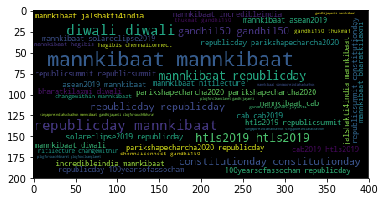

In [38]:
df1=data_en[data_en['cluster_predicted']==0]

tweet_combined1=" ".join(df1.cleaned_text.values)
word_cloud=WordCloud().generate(tweet_combined1)
plt.figure()
plt.imshow(word_cloud)
plt.show()